# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [993]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import os
import os.path
import warnings
import pandas as pd
import numpy as np
path = "/Users/KathrynChiang/Downloads/assignment3_data/fruit"
def get_fresh(path):
    """Input: path to get the files 
    Note: no / at the end of the path
    Output: extract all the Fresh1 and Fresh row to a DataFrame 
    """
    files = [os.path.join(path,fname) for fname in os.listdir(path)]
    file_name = [fname for fname in os.listdir(path)]

    fruit_name = []
    for i in range(len(file_name)):
        fruit_name.append(file_name[i].split('.xlsx')[0])

    infile = os.path.basename(path)
    fresh = pd.DataFrame() #empty dataframe

    for i in range(len(files)):
        f = pd.read_excel(files[i])

        s = pd.Series(f[list(f)[0]])
        sw = s.loc[s.str.startswith('Fresh', na = False)]
        index = []
        for j in sw.index.values:
            index.append(j)
        for k in index:
            fresh1 = f.loc[f[list(f)[0]] == str(f[list(f)[0]][k])]
            fresh1 = fresh1.rename(columns = {f.columns[0]:'form'})
            fresh1['food'] = fruit_name[i]
            fresh1.insert(0, 'type', infile)
            fresh = fresh.append(fresh1,ignore_index = True)
      
        """fresh2 = f.loc[f[list(f)[0]] == ('Fresh')]
        fresh2 = fresh2.rename(columns = {f.columns[0]:'form'})
        fresh2['food'] = fruit_name[i]
        fresh2.insert(0, 'type', infile)
        fresh = fresh.append(fresh2,ignore_index = True)
       """ 
    fresh = fresh.rename(columns = {'Unnamed: 1':'price_per_lb', 
                         'Unnamed: 3':'yield',
                         'Unnamed: 4':'lb_per_cup',
                         'Unnamed: 6':'price_per_cup'}) #rename colnames

    fresh = fresh.drop('Unnamed: 5', axis =1) #remove unwanted cols.
    fresh = fresh.drop('Unnamed: 2', axis =1)

    cols = ['type','food','form','price_per_lb','yield','lb_per_cup','price_per_cup']
    fresh = fresh[cols]

    return fresh
get_fresh(path).head(5)

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [994]:
path = "/Users/KathrynChiang/Downloads/assignment3_data/vegetables"
print "There are no prices for tomatoes.\nIn the tomato file, the Fresh row does not have any values, so it will return NaA or an empty cell in stead of some numbers.\nYes, carrots, cauliflower, celery, lettuce_romaine, mushrooms, and spinach files have the same problem as the tomatoes file."
get_fresh(path).head(5)

There are no prices for tomatoes.
In the tomato file, the Fresh row does not have any values, so it will return NaA or an empty cell in stead of some numbers.
Yes, carrots, cauliflower, celery, lettuce_romaine, mushrooms, and spinach files have the same problem as the tomatoes file.


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
1,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
3,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
4,vegetables,broccoli,Fresh,,,,NaN


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [995]:
fruit_path = "/Users/KathrynChiang/Downloads/assignment3_data/fruit"
vege_path = "/Users/KathrynChiang/Downloads/assignment3_data/vegetables"
fruit = get_fresh(fruit_path)
veget = get_fresh(vege_path)
veget = veget.dropna()
fruit_n_vege = fruit.append(veget,ignore_index=True)
fruit_n_vege

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
1,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
4,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
5,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
6,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
7,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
8,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
9,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [996]:
#What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
def max_n_min(dataframe, colname_list):
    """input: a dataframe that you want to do Max and Min with
    Output: Max and Min of that column
    """
    for i in range(len(dataframe)):
        if dataframe[colname_list][i] == dataframe[colname_list].max():
            max_price_per_lb = dataframe['food'][i]
        if dataframe[colname_list][i] == dataframe[colname_list].min():
            min_price_per_lb = dataframe['food'][i]
            return max_price_per_lb, min_price_per_lb
maxmin_pplb = max_n_min(fruit_n_vege,'price_per_lb')
print "%s are the most expensive (per pound).\n%s are the least expensive (per pound)." % (maxmin_pplb[0],maxmin_pplb[1])

raspberries are the most expensive (per pound).
watermelon are the least expensive (per pound).


From the histograms of price per pound for two catagories Fruits and Vegetables, we can see that the histogram for fruits is skewed to the right and the histogram for vegetables is a bimodal distribution which means that we can divide vegetables into two groups, one group is a lot more expensive than the other group. Fruits are mostly fall on $1-$1.5 per lb, and Vegetables are mostly fall on $1 per lb or $2-$3 per lb. From the summaries below we can observe that the range of fruits are from 0.33 to 6.98. It's mean is 2.08, and the range of Vegetables are smaller than the Fruits from 0.56 to 3.21. It has a smaller mean of 1.84 compare to the Fruits.


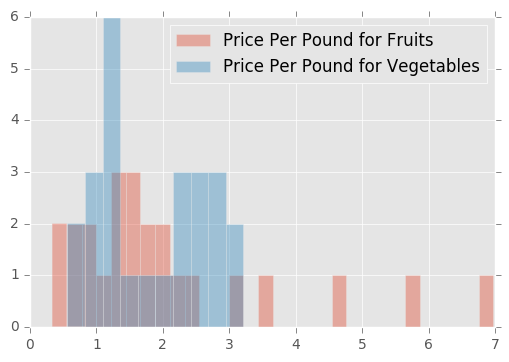

fruit summary
count    24.000000
mean      2.076877
std       1.675687
min       0.333412
25%       1.000830
50%       1.579351
75%       2.219895
max       6.975811
Name: price_per_lb, dtype: float64
vegetables summary
count    25.000000
mean      1.838701
std       0.817285
min       0.564320
25%       1.213039
50%       1.639477
75%       2.569235
max       3.213552
Name: price_per_lb, dtype: float64


In [997]:
#How do the price distributions compare for fruit and vegetables?
print "From the histograms of price per pound for two catagories Fruits and Vegetables, we can see that the histogram for fruits is skewed to the right and the histogram for vegetables is a bimodal distribution which means that we can divide vegetables into two groups, one group is a lot more expensive than the other group. Fruits are mostly fall on $1-$1.5 per lb, and Vegetables are mostly fall on $1 per lb or $2-$3 per lb. From the summaries below we can observe that the range of fruits are from 0.33 to 6.98. It's mean is 2.08, and the range of Vegetables are smaller than the Fruits from 0.56 to 3.21. It has a smaller mean of 1.84 compare to the Fruits."
plt.hist(fruit['price_per_lb'].dropna(),bins=30,alpha=.4,label='Price Per Pound for Fruits')
plt.hist(veget['price_per_lb'].dropna(),bins=10,alpha=.4,label='Price Per Pound for Vegetables')
plt.legend()
plt.show()
warnings.filterwarnings("ignore")
fruit['price_per_lb'] = fruit['price_per_lb'].convert_objects(convert_numeric=True)
print 'fruit summary\n', fruit['price_per_lb'].describe()
veget['price_per_lb'] = veget['price_per_lb'].convert_objects(convert_numeric=True)
print 'vegetables summary\n', veget['price_per_lb'].describe()

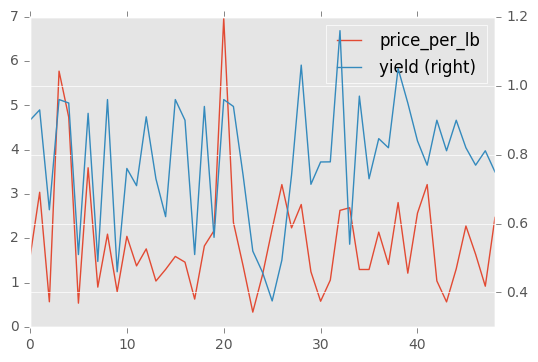

I think watermelon has the best value for the price because you get the least price with the most pounds of that item.


In [998]:
#Which foods are the best value for the price
best_val = fruit_n_vege[['price_per_lb','yield']].groupby(level=0).sum()
#best_val.plot(y='price_per_lb')
best_val.plot(secondary_y='yield')
plt.show()
print "I think watermelon has the best value for the price because you get the least price with the most pounds of that item."

In [999]:
#What's something surprising about this data set
print "I am surprised that some fruits are a lot more expensive than vegetables. For example, on the histogram, the red bars that are to the right of the blue bars. Those red bars indicate the fruits that are more expensive than the most expensive vegetable. I am also surprised that the distribution for the vegetables is bimodal distribution, since I expect vegetables to have a normal distribution."

I am surprised that some fruits are a lot more expensive than vegetables. For example, on the histogram, the red bars that are to the right of the blue bars. Those red bars indicate the fruits that are more expensive than the most expensive vegetable. I am also surprised that the distribution for the vegetables is bimodal distribution, since I expect vegetables to have a normal distribution.


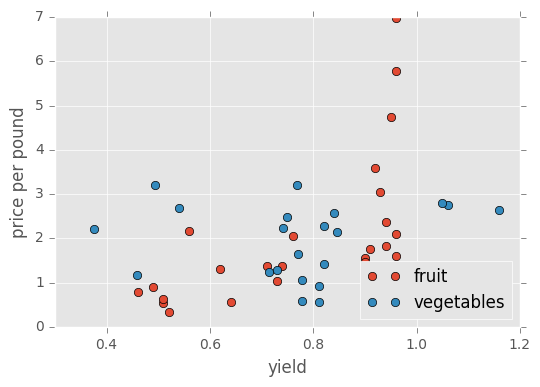

I assume that if the food with the most yield and lowest price per pound, it would has the best value. It would be more towards the right down corner of the scattered plot. Thus, I divide the yield column to the price_per_lb column to get the value for yield when each foods is 1 unit of price per pound. So, we get watermelon as the best value for the price with the value of 1.559632, since it has the highest value of yield with 1 unit of price per pound.


In [1000]:
#Which foods do you expect to provide the best combination of price, yield, and nutrition?
value = fruit_n_vege['yield']/fruit_n_vege['price_per_lb']
def best_value(value):    
    for i in range(len(value)):
            if value[i] == value.max():
                max_value = value[i]
                return fruit_n_vege['food'][i],max_value

fig, ax = plt.subplots(1, 1)
def scatter(group):
    plt.plot(group["yield"], group["price_per_lb"], "o", label = group.name)
fruit_n_vege.groupby("type").apply(scatter)
ax.set(xlabel = "yield", ylabel = "price per pound")
ax.legend(loc = 4)
plt.show()
print "I assume that if the food with the most yield and lowest price per pound, it would has the best value. It would be more towards the right down corner of the scattered plot. Thus, I divide the yield column to the price_per_lb column to get the value for yield when each foods is 1 unit of price per pound. So, we get %s as the best value for the price with the value of %f, since it has the highest value of yield with 1 unit of price per pound." % (best_value(value)[0], best_value(value)[1])